# Project 3: Density Functional Theory and Machine Learning


## Introduction

In this project, you are going to be using VASP (Vienna Ab Initio Simulation Package, https://www.vasp.at) to study the pressure driven structural transition in Si. At standard temperature and pressure conditions the ground state of Si is the diamond cubic structure. The diamond cubic structure is a face center cubic (FCC) lattice with a two-atom basis. At elevated pressures Si is known to have a structural phase transition to the β-Sn structure at a pressure of 15.2 GPa. Both structures are shown below.


<img src="static/structures.png" alt="diamond cubic Si and beta-Sn Si" width="500"/>

The figure of the diamond cubic structure is actually shown as a body centered tetragonal structure, hopefully helping you see the similarity between the two structures. (It is always possible to represent the FCC & BCC lattices as a body-centered tetragonal lattice.) This representation also allows one to study the transformation pathway between the phases. Another example of a transformation is the Bain transformation caused by strain that takes BCC to FCC in iron. Here it is possible to obtain both the diamond cubic phase and the β-Sn structures of Si merely by changing the ratio of c/a. 

We are going to use VASP to predict the hydrostatic pressure at which Si transforms from the diamond-cubic structure to the β-Sn structure. The procedure is straightforward. You will compute the energy as a function of volume for the two crystal structures and then fit the energy vs. volume curves to an equation of state. You can then determine the transition pressure using standard thermodynamic arguments. 

---

## VASP Background: 

VASP is a very complex program with many sections of code and input files. In this short module on electronic structure methods, which VASP is one of, we will not attempt to understand everything in the code, but focus on key aspects of the code.

- Performs the electronic and ionic minimization and calculates the ground-state properties using Kohn-Sham (KS) orbitals expanded with Planewave (PW) basis set. 
- Solves the KS equations self-consistently with an iterative matrix diagonalization and mixing of charge densities. 
- Calculates the energy terms of the KS Hamiltonian and the charge densities in real and reciprocal spaces via fast Fourier transformations (FFT). 
- Works for any system including atoms, molecules, bulk solids, surfaces, clusters, etc. 
- Provides the pseudopotentials USPP, PAW, etc for most elements. 
- Provides the exchange correlation functionals of LDA, PBE, hybrids, etc. 

### Input files: 
In this repository you will find the files that are required to run VASP: INCAR, KPOINTS, POSCAR and POTCAR. 

#### INCAR: 
This is the central file that controls the run with flags, which allow you to control many aspects of a run. Most of the flags will be left in their default setting. [more info](https://cms.mpi.univie.ac.at/vasp/vasp/INCAR_File.html)

#### KPOINTS: 
This allows you to control the sampling of the Irreducible Brillouin Zone. The simplest way to think about this is to compare this to integrating and the more points you use to integrate over the more accurate (generally) your answer is. [more info](https://cms.mpi.univie.ac.at/wiki/index.php/KPOINTS)


#### POSCAR: 
This contains the structural information for the system, the lattice and the position of the atoms. [more info](https://cms.mpi.univie.ac.at/vasp/guide/node59.html)

#### POTCAR: 
This contains the information about the potential and exchange correlation functions. [more info](https://cms.mpi.univie.ac.at/vasp/vasp/POTCAR_file.html)

For more information on VASP please see the [VASP Manual.](http://cms.mpi.univie.ac.at/vasp/vasp/vasp.html)

## UNIX Shell and Running VASP:

In this project you will need to use some basic shell commands to create new directories with input and output files. If you are unfamiliar with UNIX-style shells, this is a great tutorial https://swcarpentry.github.io/shell-novice/02-filedir/index.html. 

In the interest of time and computing resources, we have also created a fake VASP executable to run you calculations for this project called "fake_vasp". To do this, we pre-computed all of the data you will need for this project and wrapped it in a program that behaves just like VASP does. The advantage to this approach is you get direct feedback when you submit a calculation instead of having to wait for your job to clear the supercomputer queue. 

To perform a VASP calculation, all you have to do is enter the command ```fake_vasp``` followed by the ```-in``` flag and the path to the directory you would like VASP to run in. You can either do this in a new terminal created via the Project 3 Binder home screen or in code cells of the jupyer notebooks by prefixing them with "!" and putting semicolons (;) between commands if you need to run multiple at once. For example, 

``` 
!fake_vasp -in example_input_files;
```
would run fake_vasp in the example_input_files directory. The output files will appear in that directory.

---


## Problem 1: Determine the Ground State Structures for the Two Phases 

### Part A: Preparing the  POSCAR input file

In VASP, the POSCAR file specifies the positions of all of the atoms in a calculation. In this part of the project we'll be preparing two POSCAR files: One for diamond cubic Si and one for $\beta$-Sn Si.

#### Diamond Cubic Si

You can find a detailed description of the structure [here](http://web.iitd.ac.in/~ajeetk/AML736/Assignment2_Prob3.pdf).
The diamond cubic structure has lattice vectors:

$\vec{a_1} = 0\vec{e_x} + \frac{a}{2}\vec{e_y} + \frac{a}{2}\vec{e_z} $

$\vec{a_2} = \frac{a}{2}\vec{e_x} + 0\vec{e_y} +  \frac{a}{2}\vec{e_z} $

$\vec{a_3} = \frac{a}{2}\vec{e_x} + \frac{a}{2}\vec{e_y} + 0\vec{e_z} $

and two atoms at each lattice point with basis vectors:

$\tau_1 =  (0, 0, 0)$

$\tau_2 =  (\frac{1}{4}, \frac{1}{4}, \frac{1}{4})$

where $a$ is the lattice parameter (use the experimental value of a = 5.43 Å). 


#### Beta-Tin  Si

The $\beta$-Sn structure has lattice vectors:

$\vec{a_1} = a\vec{e_x} + 0\vec{e_y} + 0\vec{e_z} $

$\vec{a_2}  = 0\vec{e_x} + a\vec{e_y} +  0\vec{e_z} $

$\vec{a_3}  = \frac{a}{2}\vec{e_x} + \frac{a}{2}\vec{e_y} + \frac{c}{2}\vec{e_z} $

and two atoms at each lattice point with basis vectors:

$\tau_1 =  (-\frac{1}{8}, -\frac{3}{8}, \frac{1}{4})$

$\tau_2 =  (\frac{1}{8}, \frac{3}{8}, -\frac{1}{4})$

where $a$ and $c$ are the lattice parameters (use values of a = 4.9 Å, c = 2.548 Å). When $\frac{a}{c} = \sqrt{2}$, the $\beta$-Sn structure is equivalent to the diamond cubic structure.

**For Part 1A of this project, please prepare a POSCAR for each of the two structures.**

### Part B: Preparing the INCAR and KPOINTS

#### The INCAR File
The INCAR file is the main input file for VASP calculations. The INCAR flags of interest to us during this project are [ENCUT](https://cms.mpi.univie.ac.at/vasp/vasp/ENCUT_tag.html), [ISMEAR + SIGMA](https://cms.mpi.univie.ac.at/vasp/guide/node124.html), [IBRION](https://cms.mpi.univie.ac.at/vasp/vasp/IBRION_tag.html), [NBANDS](https://cms.mpi.univie.ac.at/vasp/vasp/NBANDS_tag.html), [NSW](https://cms.mpi.univie.ac.at/vasp/vasp/NSW_tag.html), [ISIF](https://cms.mpi.univie.ac.at/vasp/vasp/ISIF_tag.html), and [LREAL](https://cms.mpi.univie.ac.at/vasp/vasp/LREAL_tag.html).

#### The KPOINTS File
The KPOINTS file defines the k-points mesh that we will perform our calculation over. VASP can auto-generate k-point meshes with various schemes [(more info here)](https://cms.mpi.univie.ac.at/vasp/vasp/Automatic_k_mesh_generation.html). 

**For Part 1B of this project, please prepare an INCAR file and a KPOINTS file that would create a structure optimization calculation (ISIF = ?) over a 6x6x6 k-points grid using the Monkhorst-Pack scheme with a cutoff energy of 250 eV (ENCUT = ?). Employ Gaussian smearing (ISMEAR = ?) with $\sigma=0.2$ eV (SIGMA = ?) and allow up to 15 ionic relaxation steps (NSW = ?). Tell VASP to use the conjugate gradient method (IBRION = ?) and set LREAL to Auto. For EDIFF and EDIFFG use 0.0004 and -0.01. Follow the VASP documentation linked above to determine which flags to change and what values to use. This will be a PBE  projector augmented wave (PAW) calculation (as defined in the POTCAR. You can find starter INCAR and KPOINTS files in the "example_input_files" directory of this repo.**

### Part C: Convergence Tests

In this problem you will be analyzing the results of convergence tests. In general, during a DFT structure optimization run the system's energy decreases with little fluctuation and eventually reaches the ground state. Reaching the ground state in this fashion is an example of convergence and is required for a meaningful run. To ensure that a new system converges it is necessary to perform proper convergence tests to avoid any chance of divergence or other situations where your system does not reach the ground state. Running without checking the following convergence can result in you ending up with incorrect results. The two most important convergence checks are ENCUT and the k-points mesh. 

#### Effect of $E_{cut}$ on convergence

First, you will perform density functional theory (DFT) structure relaxation calculations for the diamond cubic phase and determine how sensitive the outcome of these calculations is to the cutoff energy, $E_{cut}$. 

<img src="static/ecut.png" alt="Cutoff energy" width="200"/>


This sets the energy of the planwaves (PW), which will be included. Only PWs with energies less than this cutoff energy are used in the calculation. ENCUT is generally in the range of 150 – 400 eV, default values for ENMIN and ENMAX are given in the POTCAR file. The value of ENCUT will vary depending on the setup and the system. You must find the correct value for ENCUT prior to any real runs. You will scan through ENCUT for values of 150, 200, 250, 300, 350. You will make a plot of the final energy for each run vs. the ENCUT value. 
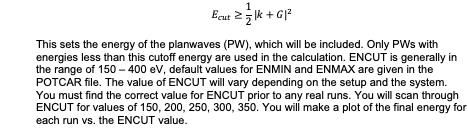

To determine the an appropriate value of $E_{cut}$ for convergence, you will perform structure optimization calculations at 150, 200, 250, 300, and 350 eV. For all of these calculations, use a 6x6x6 grid of k-points generated via the Monkhorst-Pack scheme. For the rest of the VASP flags, use the settings specified in the input files you wrote in Part B.

#### Effect of k-point density on convergence

After you have determined an appropriate $E_{cut}$, you will evaluate convergence with k-point density. Using the value of $E_{cut}$ you found, perform structure optimization calculations for Monkhorst-Pack k-points grids from 2x2x2 to 12x12x12 until convergence is obtained. For the rest of the VASP flags, use the settings specified in the input files you wrote in Part B.

You will similarly need to perform the same convergence tests for the β-Sn structure (more information on details in Problem 2.)

**You can find a pymatgen walkthough for this problem in the notebook "01 - Problem 1.ipynb".**

---

## Problem 2: Determine the Phase Transformation Pressure

To determine the pressure at which Si undergoes a β-Sn $\rightarrow$ diamond cubic phase transformation, you will calculate the energy of the two structures as a function of volume per atom using the input parameters you determine in part 1. 

Calculating this curve for diamond cubic Si is straightforward - there is only one length scale in the diamond cubic structure, and this is set by the lattice parameter. Simply change the lattice parameter in the POSCAR file. This is slightly more difficult for the β-Sn structure because it is determined by two parameters, not just one. The parameters are a, the lattice parameter, and the ratio, c/a. In principle, at each volume, one needs to vary and c/a to put the crystal under a hydrostatic stress state, while maintaining the volume per atom, $\frac{a^2c}{4}$, constant. This, however, increases the complexity of your task immensely. We will, therefore assume that the ratio c/a does not vary as the volume is changed. This makes computing the energy vs. volume curve straightforward.

Use the same energy cut-off that you found for the diamond cubic structure, but you should check the k-point convergence, which will be slower here since c/a<1.

To find c/a for the β-Sn phase, you will need to relax the atomic structure. This can be accomplished using the INCAR flag ISIF = 3. As you learned in lecture, there are a number of flags that can be set to control the run. One is smearing to set the occupation of the electrons. When converging the electronic structure, one computes the energies at a number of k-points, sorts these energies from lowest to highest, and then occupies the lowest energy states. During the course of a structural relaxation, the specific states that get occupied can change (at each k-point there are a number of band states – these frequently have different symmetries and move up and down in energy at different rates as the potential changes during the numerical search for self-consistency). This change typically yields an abrupt jump in the total energy, and can lead to problems in the numerical approach to finding the self-consistent solution.

To address this problem, one can employ a physically motivated numerical trick. Instead of making the occupations of the energy levels near the Fermi level strictly 0 or 1, one allows partial occupation of the states. The single particle energy levels in nature is governed by the Fermi-Dirac distribution:

<img src="static/fdeq.png" alt="Fermi-Dirac distribution" width="200"/>

Here, $n_i$, is the occupation of the ith energy level $ε_i$ , T is the temperature, k is Boltzmann’s constant, and $μ_i$ is the chemical potential of the particles (this corresponds to the Fermi level T=0). As the temperature is increased, the occupations of the levels near the Fermi level become non-integral. Some of the levels above and below the Fermi level are partially occupied. In electronic structure parlance, this is referred to as occupation smearing.

<img src="static/fd.png" alt="Fermi-Dirac distribution" width="300"/>

The benefits of this partial occupation to the numerical approach are obvious. Since the levels near the Fermi level are only partially occupied, the crossing of these levels induced by changes in the potential results in smoother changes in the total energy, and well-behaved numerical routines. Of course, the temperatures at which this smearing is significant are very high. Typically Fermi levels are measured using eV. One eV corresponds to a temperature of approximately 11,000 K. So the smearing in the figure is exaggerated compared to what one expects. 

Modern electronic structure codes smear the occupations at the Fermi level. Since the magnitude of the smearing one employs is quite large, it is a bit unphysical. Consequently, there is no reason a priori to employ the Fermi-Dirac distribution, and other smearing methods, with optimized numerical behavior, have been developed. This development includes smearing the states while understanding how results can be corrected for the unphysical smearing. In our calculation, we will use Guassian smearing with 0.2 eV (which is large) as our smearing factor. You should check the sensitivity of your answers to choice of smearing. 

As a consequence of the smearing, we need to consider more than just the bands that we know to be filled in the diamond cubic structure. Hence we increase the number of bands that are computed using NBANDS in the INCAR (NBANDS = 8). This tells the code to use 8 bands for the calculation. Since each unit cell has two atoms, and each atom contributes four electrons, only four bands will be filled (assuming the β-Sn structure is not a band-overlap metal). Nevertheless, we increase the number of bands in order to be consistent with the smearing – we cannot smear the filling of non-existent states.

Once you have computed the two energy vs. volume curves, the rest of the problem is straightforward. You will need to fit the results to the Murnaghan equation of state:

<img src="static/Murnaghan.png" alt="Murnaghan equation of state" width="300"/>


Where $V$ is the volume, $V_0$ is the volume at equilibrium, $E_0$ is the energy at equilibrium, $B_0$ is the bulk modulus, and $B'_0$ is the first order coefficient describing the pressure dependence of the bulk modulus. All of the parameters, excepting $V$, should be viewed as fitting parameters. Based on your fitted curves (and the resulting parameters) you should be able to determine the lattice parameters and bulk moduli for the equilibrium structures, as well as the transition pressure and volumes for both phases. 

#### *You can find a pymatgen+atomate walkthough for this problem in the notebook "02 - Problem 2.ipynb".*

---

## Problem 3: Critically Analyze Reported DFT Results

The following is an excerpt from a paper which proports to have used *ab initio* density functional theory to study a new energy material, sherburnite. 

> *Ab-initio* density functional theory calculations were performed to determine the ground state structure, band gap, and phase stability of a new energy material, sherburnite. All calculations were performed using the Vienna Ab-initio Simulation Package (VASP) using a Gaussian-type basis set for periodic systems. Exchange-correlation effects of the electronic density are accounted for using the Perdew–Burke–Ernzerhof (PBE) functional and a mesh of 1000 k-points per reciprocal atom were used with a cutoff energy of 250eV (thus allowing efficient calculations). Although a phase transformation has been observed above 300K from the cubic dagdeline phase to the tetragonal sherburnite phase, our calculations show that the ground state energy of the tetragonal phase at 0K is actually 0.010 eV lower than that of the cubic phase. This indicates that the cubic dagdeline phase is only metastable at low temperatures. We calculate tetragonal sherburnite’s band gap to be 1.90 eV, which indicates the compound may also be a good candidate for X APPLICATION, which is widely believed to required a bandgap below 2.0 eV...

**In your report, please evaluate the calculation details of this study and discuss any problems with the authors' methodology, understanding of VASP, or interpretation of their results.**

---

## Problem 4: Train a Machine Learning Model to Predict Bulk Modulus

Machine learning is an emerging tool in computational materials science that can aid in materials discovery and design. In the final part of this project, you will train two statistical models to predict bulk modulus from basic features of a material's structure. Once you have trained this model, you will predict the bulk modulus for the two Si phases you investigated earlier in the project and compare how your ML model stacks up against DFT. 

(More details on this part of the project will be released after Spring Break)

#### *We will upload a pymatgen+matminer walkthough for this problem in the notebook "04 - Problem 4.ipynb".*

---

## The Report
You should submit a complete, well-written report of how you conducted the calculations and why you did what you did. I would like for this report to contain the answers that you found, as well as a discussion of their values. Do you trust them? How well do they compare with experiment? Etc. You should include relevant sections of output files, input files and any scripts that you used to run the calculations. You are to produce your own results and analysis. This assignment is due on Friday XXXXXXX and submitted through bCourses.

## Problem Walkthroughs
The notebooks in this repository will walk you through typical workflows that computational materials researchers today would use to solve these problems today. A lot of the details of running DFT calculations have been abstracted away by software in recent years, which has helped make DFT more accessible, faster to use, and robust. We will be using these tools in this project to give you a taste (and some practical training) on how DFT is done today. 